Implement low- and high-pass image filters by zeroing different ranges of the DCT
coefficients.

Low Pass Filter - A low pass filter is used to remove the higher frequencies in a signal of data. It smoothes the noise.<br>
High Pass Filter - A high pass filter is used to remove the lower frequencies in a signal of data. It amplifies the noise.

In [120]:
from scipy import fftpack
import matplotlib.pyplot as plt
import cv2
import math

In [121]:
def computeDCT(image):
    return fftpack.dct(fftpack.dct(image.T, norm='ortho').T, norm='ortho')

In [127]:
def computeIDCT(dct):
    return fftpack.idct(fftpack.idct(dct.T, norm='ortho').T, norm='ortho')    

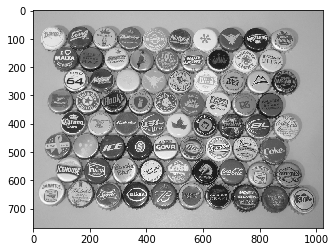

In [131]:
image = cv2.imread('bottlecaps.jpg', 0)
plt.imshow(image, cmap='gray')
plt.show()

In [123]:
#Obtaining the DCT of the image
J = computeDCT(image)

Below I have made a low pass filter by zeroing the elements from the range of 40 till the end. 

In [124]:
#Creating the lowpass filter
lowpassJ = J.copy()
lowpassJ[40:,40:] = 0

In [128]:
lowpassI = computeIDCT(lowpassJ)
diffI = abs(image - lowpassI)

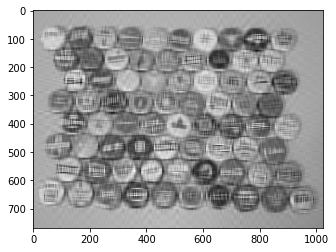

In [129]:
plt.imshow(lowpassI, cmap='gray')
plt.show()

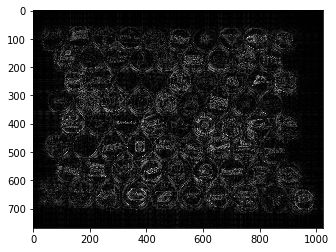

In [130]:
plt.imshow(diffI, cmap='gray')
plt.show()

Below is another low pass filter by zeroing the elements from the range of 80 till the end. 

In [141]:
lowpassJ = J.copy()
lowpassJ[80:,80:] = 0

In [142]:
lowpassI = computeIDCT(lowpassJ)
diffI = abs(image - lowpassI)

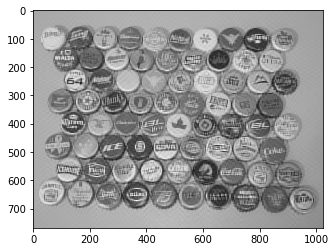

In [143]:
plt.imshow(lowpassI, cmap='gray')
plt.show()

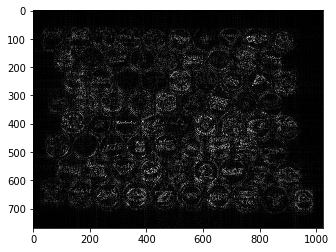

In [144]:
plt.imshow(diffI, cmap='gray')
plt.show()

As you can see from the above two examples the images gets blurred when you implement a low pass filter. If the range is large the blur effect is more.

Below I have implemented the high pass filter by zeroing the elements from range 0 to 20.

In [148]:
#Creating the high pass filter
highpassJ = J.copy()
highpassJ[0:10, 0:10] = 0 

In [149]:
highpassI = computeIDCT(highpassJ)
diff = image - highpassI

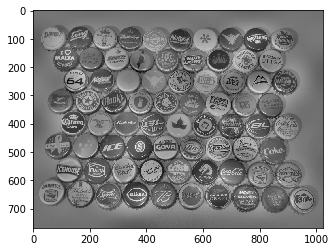

In [150]:
plt.imshow(highpassI, cmap='gray')
plt.show()

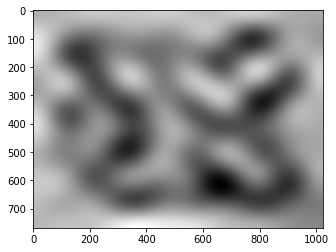

In [151]:
plt.imshow(diff, cmap='gray')
plt.show()

Below I have implemented the high pass filter by zeroing the elements from range 0 to 40.

In [163]:
highpassJ = J.copy()
highpassJ[0:40, 0:40] = 0 

In [164]:
highpassI = computeIDCT(highpassJ)
diff = image - highpassI

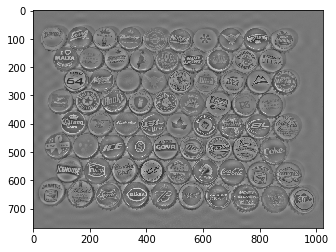

In [165]:
plt.imshow(highpassI, cmap='gray')
plt.show()

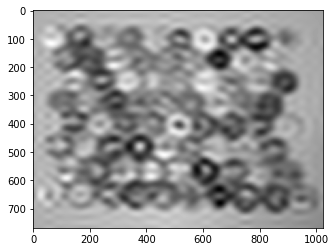

In [166]:
plt.imshow(diff, cmap='gray')
plt.show()

As you can see from the above two examples, the high pass filter makes the image sharper. As the range increases though the sharpness tends to reduce and towards the end the image becomes completely black. 

Form the above examples we can conclude that - 
Low pass filters are same as blurring masks, i.e they can be used to smooth the image.
High pass filters make the image appear sharper.